In [1]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import glob, os

import itertools

from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

import statsmodels.tsa.api as smt
import statsmodels.api as sm

import plotly.plotly as py  
import plotly.tools as tls   
import plotly.graph_objs as go

import pandas as pd
import numpy as np
import scipy
import pprint

%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

exo_list = storage.exo_list()
pp.pprint(exo_list)


df = pd.DataFrame()

for e in exo_list:
    exo_series, exo_dict = storage.load_series(e)
    
    exo_series = exo_series[exo_series.columns[0]]
    df[exo_dict['name']] = exo_series
#exo_series.plot()

[   'ES_BullishCollarBW',
    'ES_BearishCollarBW',
    'ES_CallSpread',
    'ES_PutSpread',
    'ES_ContFut',
    'ZS_BullishCollarBW',
    'ZS_BearishCollarBW',
    'ZS_CallSpread',
    'ZS_PutSpread',
    'ZS_ContFut',
    'CL_BullishCollarBW',
    'CL_BearishCollarBW',
    'CL_CallSpread',
    'CL_PutSpread',
    'CL_ContFut',
    'ZW_BullishCollarBW',
    'ZW_BearishCollarBW',
    'ZW_CallSpread',
    'ZW_PutSpread',
    'ZW_ContFut',
    'ZN_BullishCollarBW',
    'ZN_BearishCollarBW',
    'ZN_CallSpread',
    'ZN_PutSpread',
    'ZN_ContFut',
    'NG_BullishCollarBW',
    'NG_BearishCollarBW',
    'NG_CallSpread',
    'NG_PutSpread',
    'NG_ContFut',
    'ZC_BullishCollarBW',
    'ZC_BearishCollarBW',
    'ZC_CallSpread',
    'ZC_PutSpread',
    'ZC_ContFut',
    'CL_SMART_Ichimoku_Long',
    'ES_SMART_Ichimoku_Long',
    'NG_SMART_Ichimoku_Long',
    'ZC_SMART_Ichimoku_Long',
    'ZS_SMART_Ichimoku_Long',
    'ZW_SMART_Ichimoku_Long',
    'ZN_SMART_Ichimoku_Long',
    'CL_SMART

In [3]:
df.tail()

,ES_BullishCollarBW,ES_BearishCollarBW,ES_CallSpread,ES_PutSpread,ES_ContFut,ZS_BullishCollarBW,ZS_BearishCollarBW,ZS_CallSpread,ZS_PutSpread,ZS_ContFut,...,ZW_SMART_Ichimoku_Long,ZN_SMART_Ichimoku_Long,CL_SMART_Ichimoku_VerticalSpread_Bullish,CL_SMART_Ichimoku_Straddle_Bullish,ES_SMART_Ichimoku_Straddle_Bullish,NG_SMART_Ichimoku_Straddle_Bullish,ZC_SMART_Ichimoku_Straddle_Bullish,ZS_SMART_Ichimoku_Straddle_Bullish,ZW_SMART_Ichimoku_Straddle_Bullish,ZN_SMART_Ichimoku_Straddle_Bullish
2016-10-24,9400.754619,-41349.361183,9566.190872,-12774.479192,49525.0,6798.757461,-6116.161950,8479.472356,-5998.764381,33212.5,...,NaN,NaN,-671.171503,-129419.139189,-48520.876253,-3178.389404,-29731.083311,37652.591052,-30600.884154,-2147.709662
2016-10-25,9147.869703,-41208.345316,9485.469912,-12714.329390,49137.5,6797.094054,-6114.954275,8467.080508,-6006.309294,33112.5,...,NaN,NaN,-712.807425,-129901.801832,-48524.395418,-3170.198110,-29805.846642,37579.451541,-30486.486436,-2147.709662
2016-10-26,9098.523600,-41178.600711,9452.630198,-12710.129014,49062.5,7196.842850,-6444.165803,8880.046083,-6206.422305,33687.5,...,NaN,NaN,-789.973640,-130740.309951,-48520.039906,-3191.790400,-29257.009130,39016.360438,-29828.717656,-2147.709662
2016-10-27,8931.283035,-40969.605459,9368.028293,-12636.539971,48687.5,7514.471841,-6633.463434,9297.399875,-6269.413631,34187.5,...,NaN,NaN,-739.267272,-130272.703576,-48515.029676,-3198.811330,-28879.500975,40957.750998,-29688.263695,-2147.709662
2016-10-28,8774.597057,-40753.521943,9284.234630,-12566.133704,48325.0,7183.219561,-6369.510403,8902.811646,-6111.517057,33675.0,...,NaN,NaN,-767.925464,-130690.249701,-48525.192529,-3188.706826,-28714.160241,40743.519259,-29725.412060,-2147.709662


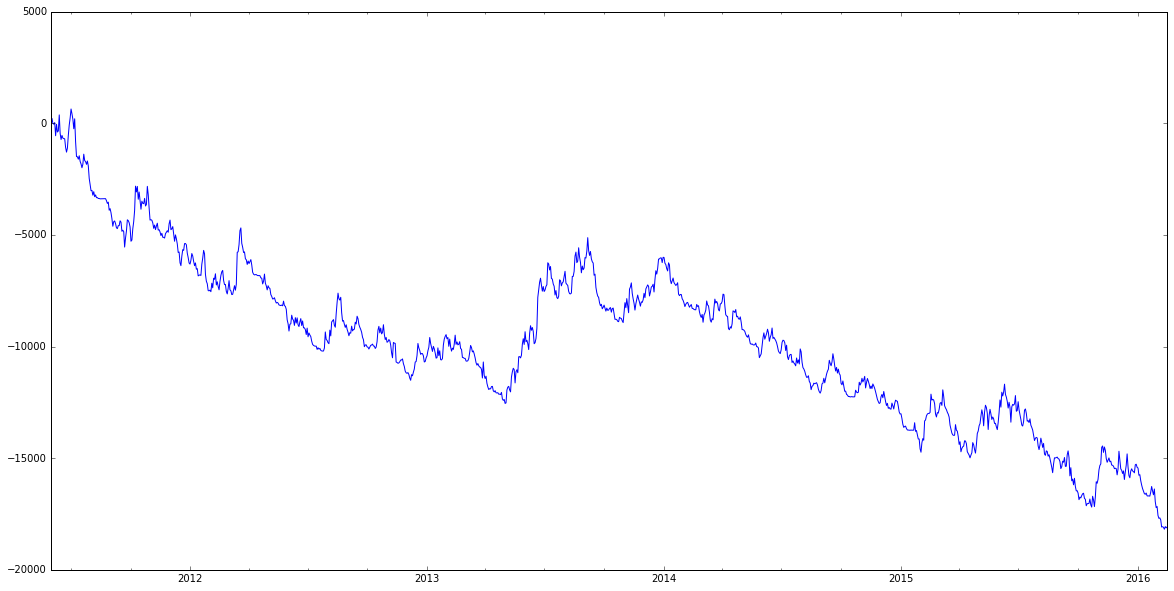

In [307]:
px_ser = df.ZN_PutSpread
px_ser.asfreq('B').dropna().plot()

In [308]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 20)
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [309]:
rolling_hurst = px_ser.dropna().rolling(40).apply(lambda x: hurst(x))

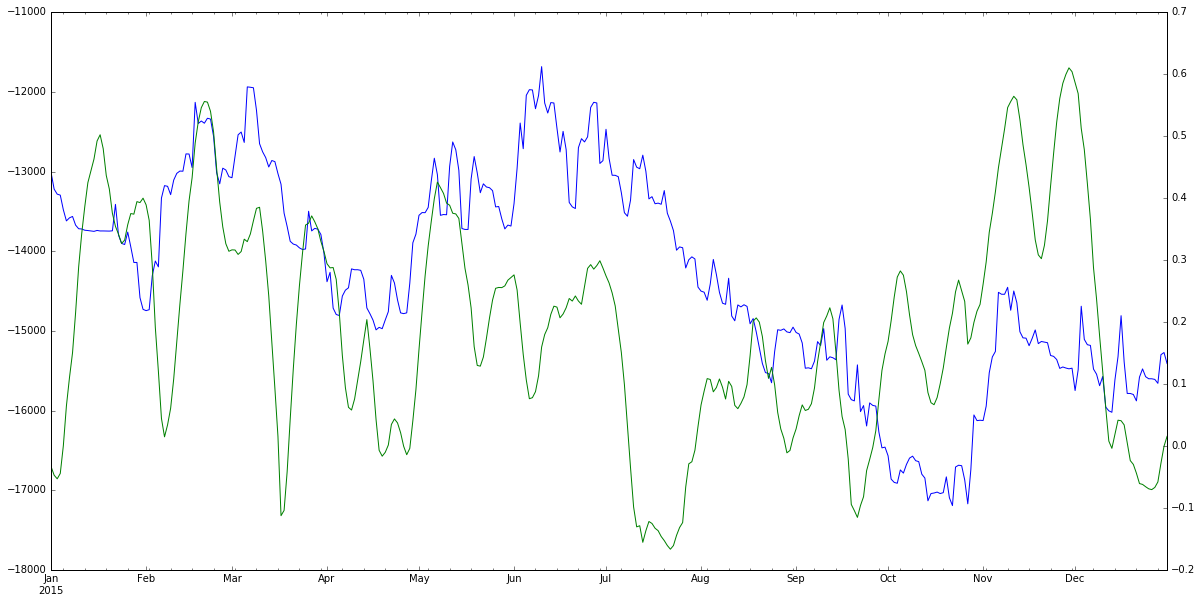

In [310]:
px_ser.dropna().ix['2015'].plot()
rolling_hurst.ix['2015'].plot(secondary_y=True)

#rolling_adfteststats.ix[:'2015'].plot(secondary_y=True)
#rstats.plot(secondary_y=True)
#axhline(rolling_hurst.mean())
#axhline(-1)

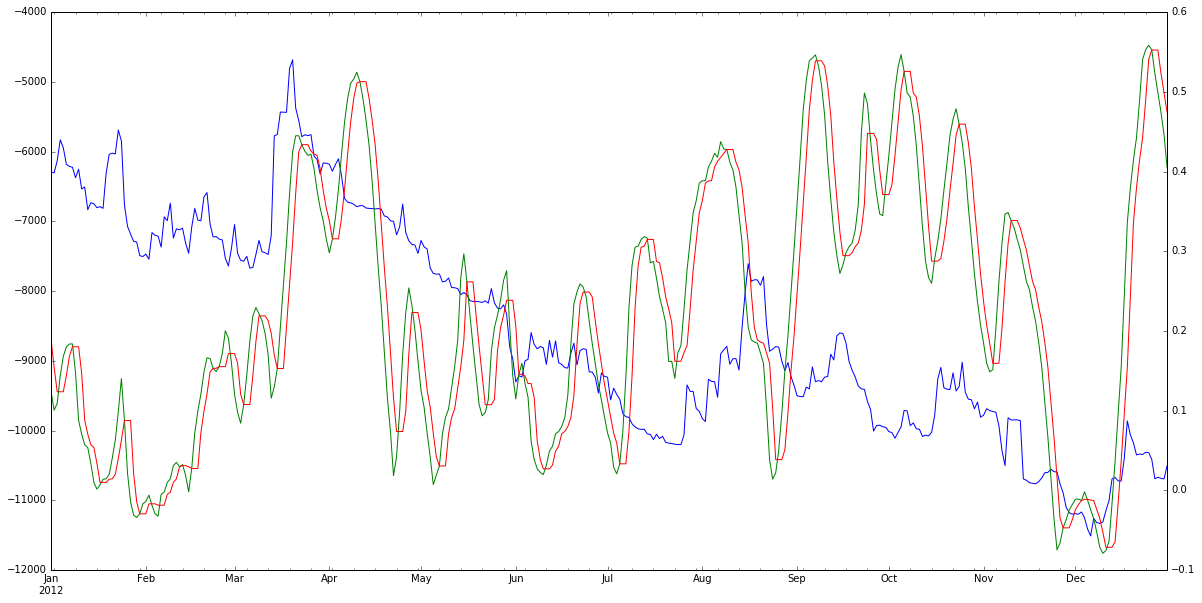

In [314]:
px_ser.dropna().ix['2012'].plot()
#px_ser.rolling(10).max().plot()
#px_ser.rolling(10).min().plot()

rolling_hurst.ix['2012'].plot(secondary_y=True)
rolling_hurst.rolling(5).median().ix['2012'].plot(secondary_y=True)

# Backtest

{'avg': 22.249959664464949,
 'avgbarsintrade': 0.8350785340314135,
 'avgmae': -66.711161715733141,
 'costs_sum': 0.0,
 'count': 382,
 'maxdd': -8236.0080890351037,
 'netprofit': 8499.4845918256106,
 'std': 382.17526593875027,
 'tradesmaxdd': -8236.0080890351037,
 'winrate': 0.599476439790576}

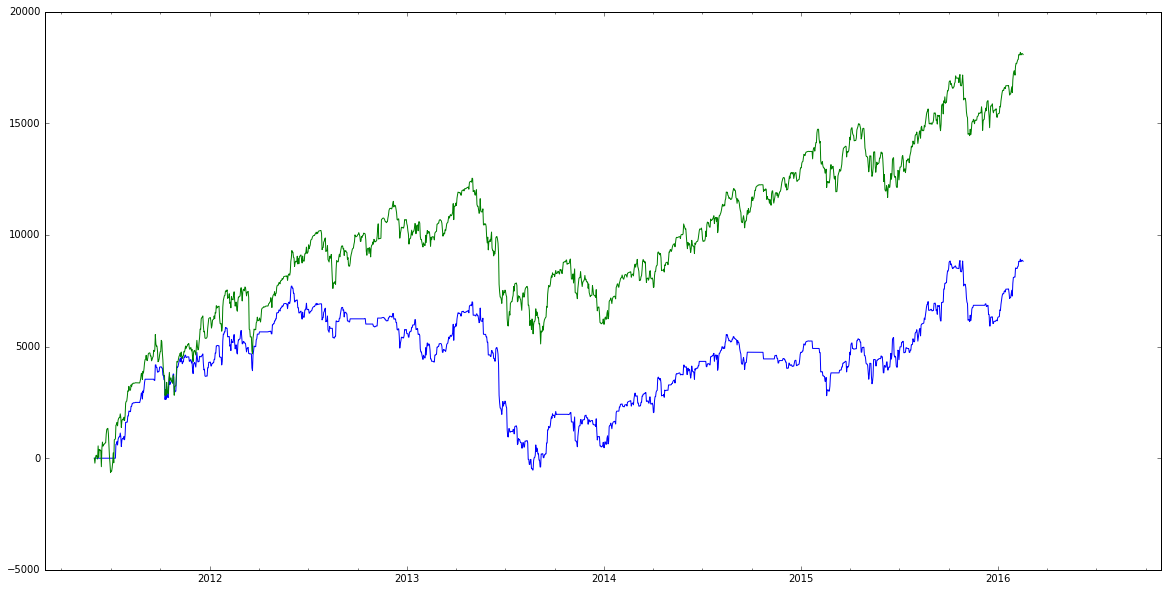

In [312]:
#entry = signals_df.long_entry_signal
#exit = signals_df.long_exit_signal

entry = (rolling_hurst <= 0.3)

exit = (rolling_hurst < rolling_hurst.rolling(20).median())
#exit = CrossUp(px_ser, px_ser.rolling(10).median())

exodf = pd.DataFrame()
exodf['exo'] = px_ser.dropna()

direction = -1
pl, inposition = backtester.backtest(exodf.iloc[:], entry, exit, direction)
equity, stats = backtester.stats(pl, inposition)


equity.plot()

(px_ser*-1).plot()

stats

In [251]:
(px_ser - px_ser.rolling(10).min())

2011-03-01            NaN
2011-03-02            NaN
2011-03-03            NaN
2011-03-04            NaN
2011-03-05            NaN
2011-03-06            NaN
2011-03-07            NaN
2011-03-08            NaN
2011-03-09            NaN
2011-03-10            NaN
2011-03-11            NaN
2011-03-12            NaN
2011-03-13            NaN
2011-03-14            NaN
2011-03-15            NaN
2011-03-16            NaN
2011-03-17            NaN
2011-03-18            NaN
2011-03-19            NaN
2011-03-20            NaN
2011-03-21            NaN
2011-03-22            NaN
2011-03-23            NaN
2011-03-24            NaN
2011-03-25            NaN
2011-03-26            NaN
2011-03-27            NaN
2011-03-28            NaN
2011-03-29            NaN
2011-03-30            NaN
                 ...     
2016-09-25     928.216453
2016-09-26     752.634832
2016-09-27       0.000000
2016-09-28       0.000000
2016-09-29    2766.503203
2016-09-30    5225.891048
2016-10-01    8966.826082
2016-10-02  

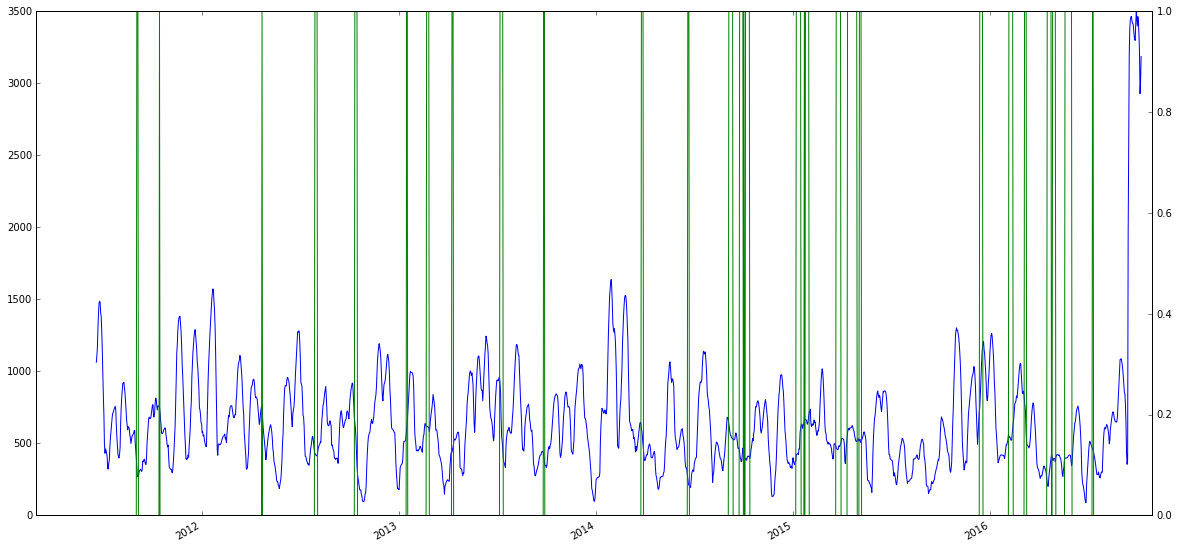

In [215]:
px_ser.rolling(20).std().plot()
(rolling_hurst <= 0.).plot(secondary_y=True)